In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('../datasets/train.csv')  # import file as df
df.shape  # starting the EDA

(2051, 81)

In [3]:
df.head()  # getting a sense of what the df looks like ( not pulling 80 columns)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


# Starting observations

*we observe: categorical features, missing values, and bizarre columns (PID, Misc feature, Fence)*

#### Data dictionary

SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.

* **MSSubClass** : The building class
* **MSZoning** : The general zoning classification
* **LotFrontage** : Linear feet of street connected to property
* **LotArea** : Lot size in square feet
* **Street** : Type of road access
* **Alley** : Type of alley access
* **LotShape** : General shape of property
* **LandContour** : Flatness of the property
* **Utilities** : Type of utilities available
* **LotConfig** : Lot configuration
* **LandSlope** : Slope of property
* **Neighborhood** : Physical locations within Ames city limits
* **Condition1** : Proximity to main road or railroad
* **Condition2** : Proximity to main road or railroad (if a second is present)
* **BldgType** : Type of dwelling
* **HouseStyle** : Style of dwelling
* **OverallQual** : Overall material and finish quality
* **OverallCond** : Overall condition rating
* **YearBuilt** : Original construction date
* **YearRemodAdd** : Remodel date
* **RoofStyle** : Type of roof
* **RoofMatl** : Roof material
* **Exterior1st** : Exterior covering on house
* **Exterior2nd** : Exterior covering on house (if more than one material)
* **MasVnrType** : Masonry veneer type
* **MasVnrArea** : Masonry veneer area in square feet
* **ExterQual** : Exterior material quality
* **ExterCond** : Present condition of the material on the exterior
* **Foundation** : Type of foundation
* **BsmtQual** : Height of the basement
* **BsmtCond** : General condition of the basement
* **BsmtExposure** : Walkout or garden level basement walls
* **BsmtFinType1** : Quality of basement finished area
* **BsmtFinSF1** : Type 1 finished square feet
* **BsmtFinType2** : Quality of second finished area (if present)
* **BsmtFinSF2** : Type 2 finished square feet
* **BsmtUnfSF** : Unfinished square feet of basement area
* **TotalBsmtSF** : Total square feet of basement area
* **Heating** : Type of heating
* **HeatingQC** : Heating quality and condition
* **CentralAir** : Central air conditioning
* **Electrical** : Electrical system
* **1stFlrSF** : First Floor square feet
* **2ndFlrSF** : Second floor square feet
* **LowQualFinSF** : Low quality finished square feet (all floors)
* **GrLivArea** : Above grade (ground) living area square feet
* **BsmtFullBath** : Basement full bathrooms
* **BsmtHalfBath** : Basement half bathrooms
* **FullBath** : Full bathrooms above grade
* **HalfBath** : Half baths above grade
* **Bedroom** : Number of bedrooms above basement level
* **Kitchen** : Number of kitchens
* **KitchenQual** : Kitchen quality
* **TotRmsAbvGrd** : Total rooms above grade (does not include bathrooms)
* **Functional** : Home functionality rating
* **Fireplaces** : Number of fireplaces
* **FireplaceQu** : Fireplace quality
* **GarageType** : Garage location
* **GarageYrBlt** : Year garage was built
* **GarageFinish** : Interior finish of the garage
* **GarageCars** : Size of garage in car capacity
* **GarageArea** : Size of garage in square feet
* **GarageQual** : Garage quality
* **GarageCond** : Garage condition
* **PavedDrive** : Paved driveway
* **WoodDeckSF** : Wood deck area in square feet
* **OpenPorchSF** : Open porch area in square feet
* **EnclosedPorch** : Enclosed porch area in square feet
* **3SsnPorch** : Three season porch area in square feet
* **ScreenPorch** : Screen porch area in square feet
* **PoolArea** : Pool area in square feet
* **PoolQC** : Pool quality
* **Fence** : Fence quality
* **MiscFeature** : Miscellaneous feature not covered in other categories
* **MiscVal** : $Value of miscellaneous feature
* **MoSold** : Month Sold
* **YrSold** : Year Sold
* **SaleType** : Type of sale
* **SaleCondition** : Condition of sale

In [4]:
df.columns  # getting all columns names


Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

*no major observation here just more weird columns (half bath, full bath) and lots of garage information too. The salesPrice is the last feature*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [6]:
df.select_dtypes(np.number).describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [7]:
# checking for unique values in each feature
df.nunique()[:39].sort_values(ascending=False)


Id                2051
PID               2051
Lot Area          1476
Bsmt Unf SF        967
BsmtFin SF 1       821
Mas Vnr Area       373
BsmtFin SF 2       205
Lot Frontage       118
Year Built         113
Year Remod/Add      61
Neighborhood        28
MS SubClass         16
Exterior 1st        15
Exterior 2nd        15
Overall Qual        10
Overall Cond         9
Condition 1          9
Condition 2          8
House Style          8
MS Zoning            7
BsmtFin Type 2       6
Roof Style           6
Roof Matl            6
BsmtFin Type 1       6
Foundation           6
Bldg Type            5
Bsmt Qual            5
Lot Config           5
Bsmt Cond            5
Exter Cond           5
Bsmt Exposure        4
Lot Shape            4
Exter Qual           4
Mas Vnr Type         4
Land Contour         4
Land Slope           3
Utilities            3
Alley                2
Street               2
dtype: int64

*lets look at missing values*

In [8]:
# exploring where are the null values, and how many are there
miss_val_features = df.isnull().sum().sort_values(ascending=False)
miss_val_features

Pool QC         2042
Misc Feature    1986
Alley           1911
Fence           1651
Fireplace Qu    1000
                ... 
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
SalePrice          0
Length: 81, dtype: int64

In [9]:
missing_percent = miss_val_features / len(df)

In [10]:
missing_percent

Pool QC         0.995612
Misc Feature    0.968308
Alley           0.931741
Fence           0.804973
Fireplace Qu    0.487567
                  ...   
Heating QC      0.000000
Central Air     0.000000
Electrical      0.000000
1st Flr SF      0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [11]:
low_qual_columns = missing_percent > 0.5
low_qual_columns ==True

Pool QC          True
Misc Feature     True
Alley            True
Fence            True
Fireplace Qu    False
                ...  
Heating QC      False
Central Air     False
Electrical      False
1st Flr SF      False
SalePrice       False
Length: 81, dtype: bool

In [12]:
#We chose to remove these columns immediately to start simplifying the EDA 

In [13]:
df.drop(columns = ["Pool QC", "Misc Feature", "Alley", "Fence"], inplace=True)

In [14]:
df.shape

(2051, 77)

#### Let's observe the price variable

In [15]:
df["SalePrice"].describe()  # lets observe SalePrice


count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

Our baseline is an average price of $181k in Ames

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

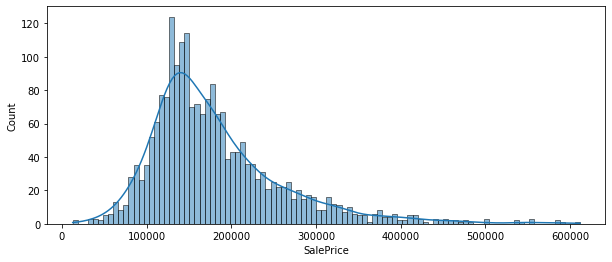

In [16]:
plt.figure(figsize=(10,4))
sns.histplot(df['SalePrice'], bins = 100, kde=True)

The prices seem to follow a normal distribution with few extreme values, which is a good thing as it will reduce the need to manipulate too many outliers  

In [17]:
#Checking highest correlations
Correlation_serie = df.corr()["SalePrice"]
Correlation_serie.sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016255
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045328
Id                -0.051398
MS SubClass       -0.087335
Overall Cond      -0

#### Lets get an intuition of the most relevant variables

In [18]:
#from the class
pearson_corr_features = df.corr()
corr_data = np.tril(pearson_corr_features,k=-1) # only looking at bottom heatmap triangle
corr_data = abs(corr_data)>0.50 # only visualizing notable correlations 

# plotting
fig = px.imshow(corr_data, x=pearson_corr_features.columns, y=pearson_corr_features.index,
                color_continuous_scale=px.colors.qualitative.Plotly, width=800, height=800,
                title="Heat map: Feature correlations with >0.5 correlation coefficient")
fig.update(layout_coloraxis_showscale=False)
fig.show()
plt.figure(figsize=(15,5))

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

In [19]:
#we observe that SalesPrice (at the bottom) has about 12 strong correlated features. 
# these features are only the numeric ones. 
# Let's have a look

In [20]:
k=12 # from the observation above
corrmat = df.corr().nlargest(k, 'SalePrice')['SalePrice']
cols = corrmat.index
cols
top_num_corr = df.corr().nlargest(k,cols)[cols]
top_num_corr

,SalePrice,Overall Qual,Gr Liv Area,Garage Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,Garage Yr Blt,Mas Vnr Area
SalePrice,1.000000,0.800207,0.697038,0.650270,0.648220,0.628925,0.618486,0.571849,0.550370,0.537969,0.533922,0.512230
Overall Qual,0.800207,1.000000,0.566701,0.563814,0.587423,0.548742,0.477136,0.602964,0.584654,0.515080,0.574553,0.438685
Gr Liv Area,0.697038,0.566701,1.000000,0.490949,0.486600,0.453635,0.562441,0.258838,0.322407,0.617323,0.286279,0.387833
Garage Area,0.650270,0.563814,0.490949,1.000000,0.893180,0.488805,0.498712,0.487177,0.398999,0.398261,0.552069,0.384718
Garage Cars,0.648220,0.587423,0.486600,0.893180,1.000000,0.432979,0.438981,0.542544,0.441796,0.467490,0.579623,0.361211
Total Bsmt SF,0.628925,0.548742,0.453635,0.488805,0.432979,1.000000,0.808756,0.410254,0.308545,0.325598,0.348384,0.408575
1st Flr SF,0.618486,0.477136,0.562441,0.498712,0.438981,0.808756,1.000000,0.323315,0.244190,0.367623,0.264124,0.391349
Year Built,0.571849,0.602964,0.258838,0.487177,0.542544,0.410254,0.323315,1.000000,0.629116,0.480169,0.825316,0.329741
Year Remod/Add,0.550370,0.584654,0.322407,0.398999,0.441796,0.308545,0.244190,0.629116,1.000000,0.471555,0.674024,0.211443
Full Bath,0.537969,0.515080,0.617323,0.398261,0.467490,0.325598,0.367623,0.480169,0.471555,1.000000,0.502766,0.240034


### Dealing with outliers

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

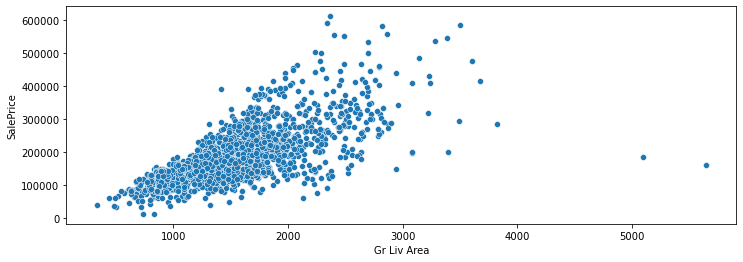

In [21]:
#for these critical features, lets see if they are polluted by outliers
plt.figure(figsize=(12,4))
sns.scatterplot(df['Gr Liv Area'],df['SalePrice'])

we will look at these 2 after completing the overview for the 12 features

<AxesSubplot:xlabel='Garage Area', ylabel='SalePrice'>

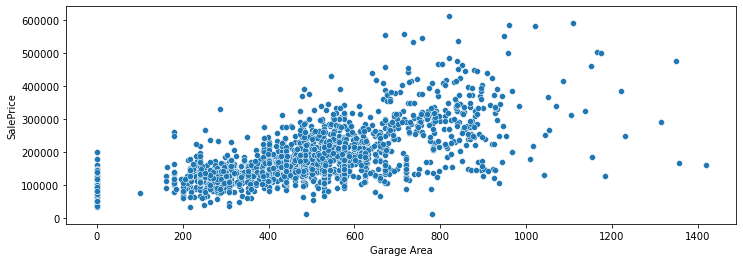

In [22]:
plt.figure(figsize=(12,4))
sns.scatterplot(df['Garage Area'],df['SalePrice'])

<AxesSubplot:xlabel='Garage Cars', ylabel='SalePrice'>

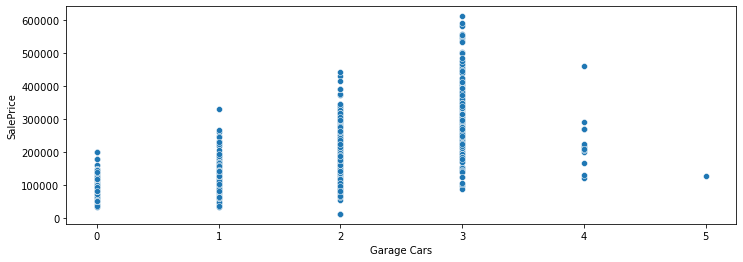

In [23]:
plt.figure(figsize=(12,4))
sns.scatterplot(df['Garage Cars'],df['SalePrice'])

<AxesSubplot:xlabel='Total Bsmt SF', ylabel='SalePrice'>

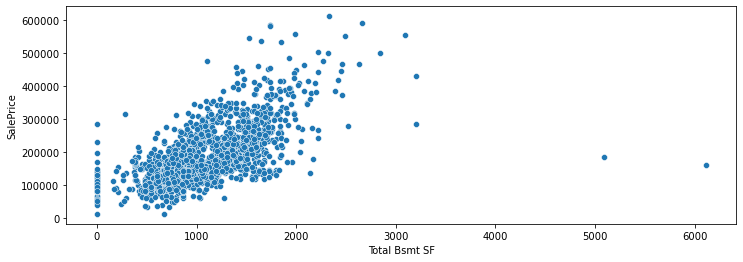

In [24]:
plt.figure(figsize=(12,4))
sns.scatterplot(df['Total Bsmt SF'],df['SalePrice'])

<AxesSubplot:xlabel='1st Flr SF', ylabel='SalePrice'>

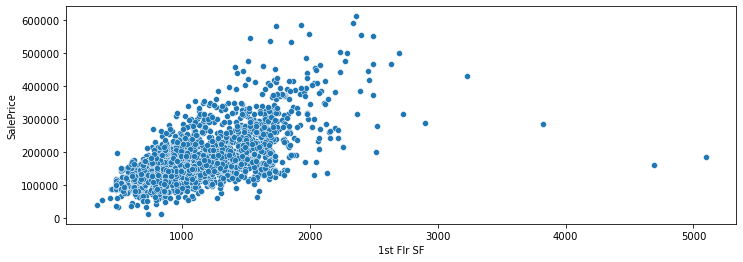

In [25]:
plt.figure(figsize=(12,4))
sns.scatterplot(df['1st Flr SF'],df['SalePrice'])

<AxesSubplot:xlabel='Year Built', ylabel='SalePrice'>

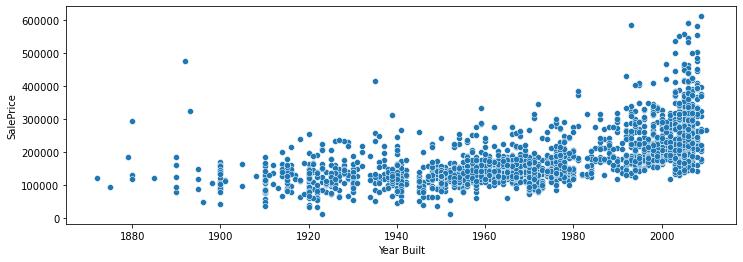

In [26]:
plt.figure(figsize=(12,4))
sns.scatterplot(df['Year Built'],df['SalePrice'])

<AxesSubplot:xlabel='Year Remod/Add', ylabel='SalePrice'>

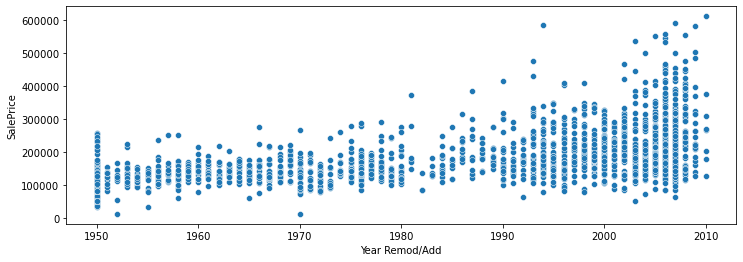

In [27]:
plt.figure(figsize=(12,4))
sns.scatterplot(df['Year Remod/Add'],df['SalePrice'])

<AxesSubplot:xlabel='Full Bath', ylabel='SalePrice'>

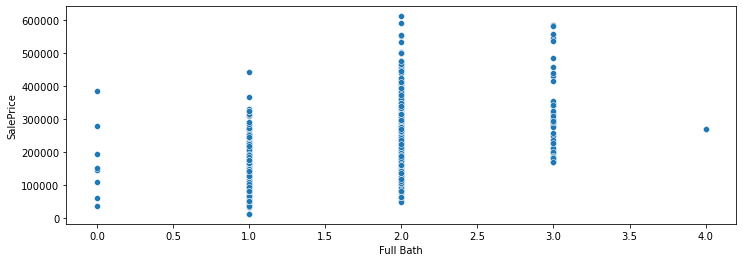

In [28]:
plt.figure(figsize=(12,4))
sns.scatterplot(df['Full Bath'],df['SalePrice'])

No obvious outliers

<AxesSubplot:xlabel='Garage Yr Blt', ylabel='SalePrice'>

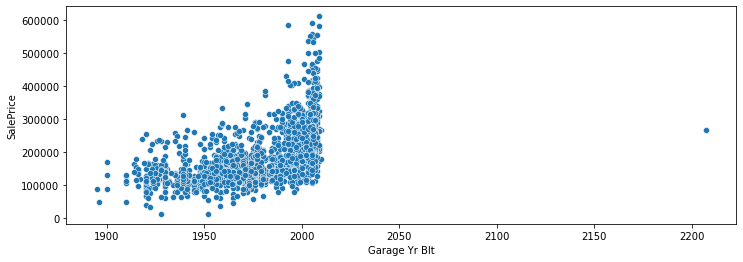

In [29]:
plt.figure(figsize=(12,4))
sns.scatterplot(df['Garage Yr Blt'],df['SalePrice'])

ok, we got to correct this one 

<AxesSubplot:xlabel='Mas Vnr Area', ylabel='SalePrice'>

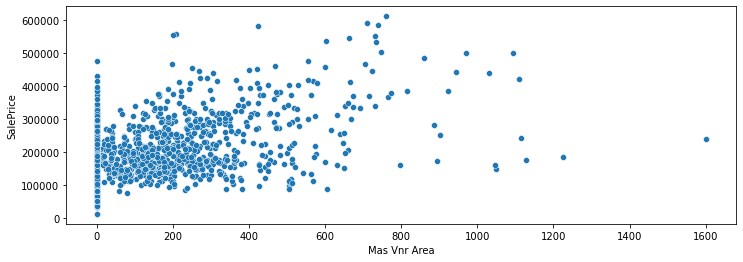

In [30]:
plt.figure(figsize=(12,4))
sns.scatterplot(df['Mas Vnr Area'],df['SalePrice'])

#### Dealing with outliers: we don;t seem to have many outliers in the most significants features. we can safely delete them ( it seems thta we have 2 outliers causing some noise)

In [31]:
#Identifying index#
print(f' Gr Liv Area {df["Gr Liv Area"].sort_values(ascending=False)[:2].index.values}')
print(f' Garage Yr Blt {df["Garage Yr Blt"].sort_values(ascending=False)[:1].index.values}')
print(f' Total Bsmt SF {df["Total Bsmt SF"].sort_values(ascending=False)[:2].index.values}')
print(f' 1st Flr SF {df["1st Flr SF"].sort_values(ascending=False)[:2].index.values}')

 Gr Liv Area [ 960 1885]
 Garage Yr Blt [1699]
 Total Bsmt SF [ 960 1885]
 1st Flr SF [1885  960]


Let's check what these records contain to understand how to impute them

In [32]:
pd.set_option("display.max_columns",None)
df.loc[[960]]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,160000


In [33]:
df.loc[[1885]]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1885,2181,908154195,20,RL,128.0,39290,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,17000,10,2007,New,183850


In [34]:
#for the garage year built put in year 2200
df.loc[[1699]]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1699,2261,916384070,20,RL,68.0,8298,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,0,9,2007,New,267300


In [35]:
#we will impute based on the house construction year - 2006
df.loc[df['Garage Yr Blt'] == 2207,'Garage Yr Blt'] =2006

#### Trying to identify multicorrelation
-Sales Price: we already know the 12 correlations <br>
-OverallQual: strongly correlate with year built, which makes sense but can be pollution<br>
-GR Liv Area:corr with Full Bath  (Above grade (ground) living area square feet)<br>
-Garage Area: Corr with Garage cars and Garage year built BUT stronger corr to SalePrice<br>
-Garage Cars: <br>
-Total Bmst SF:corr with 1st flr SF BUT stronger corr to SalePrice<br>
-1st Flr SF: <br>
-Year Built:Corr with Year Remod/Add BUT stronger corr to SalePrice<br>
-Year Remod/Add : strongly corr with Garage Year Built<br>
-Full Bath: Correlate with Gr Liv Area<br>
-Garage Yr Build: correlate with Year Remod Add<br>
-Mas Vnr Area: <br>

Based on the missing values above + the 12 most correlated features + multicolinearity identified, let's trim the dataset<br>
We want to be left with meaningful numeric data + categorical data<br>
we will then impute missing values and prepare the dataset for modelling<br> 

In [36]:
#Removing ID and PID
df.drop(columns=['Id', 'PID'], inplace=True)

In [37]:
df.shape  # control

(2051, 75)

let's look at missing values for numeric types so we can impute / remove and use Lasso/Ridge/Enet for our feature selection
  

In [38]:
na_features=df.select_dtypes(include=np.number).isnull().sum().sort_values(ascending=False)[:12]
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
na_features

Lot Frontage      330
Garage Yr Blt     114
Mas Vnr Area       22
Bsmt Half Bath      2
Bsmt Full Bath      2
BsmtFin SF 2        1
Garage Cars         1
Garage Area         1
Bsmt Unf SF         1
Total Bsmt SF       1
BsmtFin SF 1        1
Fireplaces          0
dtype: int64

In [39]:
df.loc[df['BsmtFin SF 1'].isin([np.nan])]
df.loc[df['BsmtFin SF 2'].isin([np.nan])]
df.loc[df['Bsmt Unf SF'].isin([np.nan])]
df.loc[df['Total Bsmt SF'].isin([np.nan])]
df.loc[df['Bsmt Full Bath'].isin([np.nan])]
df.loc[df['Bsmt Half Bath'].isin([np.nan])]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,0,7,2008,WD,284700
1327,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,79000


In [40]:
#we realize that these 2 records just don;t have a basement so we can impute the values with 0

In [41]:
#we group and check the features: BASEMENT
df['BsmtFin SF 1']= df['BsmtFin SF 1'].fillna(0) #no basement
df['Bsmt Unf SF']= df['Bsmt Unf SF'].fillna(0)#no basement
df['BsmtFin SF 2']= df['BsmtFin SF 2'].fillna(0)#no basement
df['Total Bsmt SF']= df['Total Bsmt SF'].fillna(0) #no basement
df['Bsmt Full Bath']= df['Bsmt Full Bath'].fillna(0)#no basement
df['Bsmt Half Bath']= df['Bsmt Half Bath'].fillna(0)#no basement

In [42]:
#Same process for garages
#we group and check the features: GARAGE
df.loc[df['Garage Area'].isin([np.nan])]
df.loc[df['Garage Cars'].isin([np.nan])]


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,0,3,2007,WD,150909


In [43]:
#Same conclusion, only 1 record with no garage 

In [44]:
df['Garage Area']= df['Garage Area'].fillna(0) 
df['Garage Cars']= df['Garage Cars'].fillna(0)

In [45]:
#lastly, checking this one
df.loc[df['Mas Vnr Area'].isin([np.nan])]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,60,RL,103.0,12867,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,0,7,2006,New,344133
41,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,0,9,2006,New,465000
86,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,0,8,2009,WD,184900
212,20,FV,90.0,7993,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,0,10,2009,New,225000
276,20,RL,75.0,8050,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,32,0,0,0,0,0,0,4,2006,WD,117250
338,60,FV,112.0,12217,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3.0,880.0,TA,TA,Y,168,127,0,0,0,0,0,12,2007,New,310013
431,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,0,3,2008,WD,237000
451,20,RL,87.0,10037,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,0,8,2008,WD,247000
591,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,0,11,2007,New,199900
844,120,FV,30.0,5330,Pave,IR2,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,8,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1550.0,1550.0,GasA,Ex,Y,SBrkr,1550,0,0,1550,0.0,0.0,2,1,2,1,Gd,5,Typ,0,NaN,Attchd,2007.0,

In [46]:
#the records above simply dont have a masonery veneer
df['Mas Vnr Type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

In [47]:
#ok, let's impute Mas Vnr Type from nan to "None" and the Mas Vnr Area from nan to 0
df['Mas Vnr Type']= df['Mas Vnr Type'].fillna("None")
df['Mas Vnr Area']= df['Mas Vnr Area'].fillna(0)

#### We are done with imputing numerical variables, now on to catgerorical ones

In [48]:
df.isnull().sum().sort_values(ascending=False)[:15]

Fireplace Qu      1000
Lot Frontage       330
Garage Cond        114
Garage Yr Blt      114
Garage Finish      114
Garage Qual        114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Half Bath            0
Functional           0
Full Bath            0
dtype: int64

In [49]:
#For garage and basement, out intuition is that these records simply don't have one. Let's run a quick check:
df.loc[df['Garage Qual'].isin([np.nan])]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
28,190,C (all),75.0,8250,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,133,0,0,0,0,6,2007,WD,119600
53,160,RM,21.0,1476,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,200,26,0,0,0,0,0,3,2010,WD,76000
65,20,RL,70.0,8402,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,30,0,0,0,0,0,12,2007,New,147000
79,50,RM,50.0,7288,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,176,0,0,0,9,2007,WD,129850
101,30,RL,58.0,9098,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,144,0,0,0,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,90,RL,94.0,9400,Pave,Reg,Low,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,2Story,6,5,1971,1971,Mansard,CompShg,MetalSd,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0.0,Unf,0.0,912.0,912.0,GasA,TA,Y,SBrkr,912,912,0,1824,0.0,0.0,2,2,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,128,0,0,0,0,0,0,4,2010,WD,139000
2010,30,C (all),69.0,12366,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,23,0,0,0,0,10,2006,WD,51689
2027,90,RL,75.0,8512,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1960,1960,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1556.0,1556.0,GasA,TA,Y,SBrkr,1556,0,0,1556,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,9,2006,WD,119000
2039,160,RM,21.0,1495,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,ALQ,384.0,Unf,0.0,162.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,64,0,0,0,0,0,5,2007,WD,93900

In [50]:
#We impute all garage missing values with "None" and we will drop the other columns related to garage that we believe do not add value to the model
df['Garage Qual']= df['Garage Qual'].fillna("None")
df['Garage Type']= df['Garage Type'].fillna("None")

In [51]:
df.loc[df['Fireplace Qu'].isin([np.nan])]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
2,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500
6,180,RM,35.0,3675,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,Y,SBrkr,1072,0,0,1072,1.0,0.0,2,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2.0,525.0,TA,TA,Y,0,44,0,0,0,0,0,6,2006,New,140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,20,RL,79.0,9236,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,Gd,TA,Gd,GLQ,1200.0,Unf,0.0,279.0,1479.0,GasA,Ex,Y,SBrkr,1494,0,0,1494,1.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,1997.0,RFn,2.0,576.0,TA,TA,Y,168,27,0,0,0,0,0,7,2006,WD,217000
2038,80,RL,80.0,9200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,6,5,1965,1965,Gable,CompShg,HdBoard,HdBoard,BrkFace,98.0,TA,TA,CBlock,TA,TA,Gd,GLQ,494.0,Unf,0.0,548.0,1042.0,GasA,TA,Y,SBrkr,1042,0,0,1042,0.0,0.0,2,0,3,1,TA,5,Typ,0,NaN,Attchd,1965.0,RFn,2.0,440.0,TA,TA,Y,192,0,0,0,0,0,0,5,2007,WD,161000
2039,160,RM,21.0,1495,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,ALQ,384.0,Unf,0.0,162.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,None,NaN,NaN,0.0,0.0,None,NaN,Y,0,64,0,0,0,0,0,5,2007,WD,93900
2044,60,RL,65.0,8453,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,5,1995,1995,Gable,CompShg,VinylSd,VinylSd,BrkFace,38.0,Gd,TA,PConc,Gd,TA,No,GLQ,362.0,Unf,0.0,392.0,754.0,GasA,Ex,Y,SBrkr,754,855,0,1609,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1995.0,RFn,2.

In [52]:
#imputing for Fireplace Qual
df['Fireplace Qu']= df['Fireplace Qu'].fillna("None")

In [53]:
#imputing for Basement
df['Bsmt Qual']= df['Bsmt Qual'].fillna("None")
df['BsmtFin Type 1']= df['BsmtFin Type 1'].fillna("None")
df['Bsmt Full Bath']= df['Bsmt Full Bath'].fillna("None")
df['Bsmt Qual']= df['Bsmt Qual'].fillna("None")
df['BsmtFin SF 2']= df['BsmtFin SF 2'].fillna("None")
df['Bsmt Unf SF']= df['Bsmt Unf SF'].fillna("None")
df['Total Bsmt SF']= df['Total Bsmt SF'].fillna("None")
df['BsmtFin Type 2']= df['BsmtFin Type 2'].fillna("None")

In [54]:
df['Lot Frontage'].unique()

array([ nan,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

In [55]:
#imputing Lot Frontage with 0
df['Lot Frontage']= df['Lot Frontage'].fillna(0)

In [56]:
df.isnull().sum().sort_values(ascending=False)[:10]

Garage Yr Blt    114
Garage Finish    114
Garage Cond      114
Bsmt Exposure     58
Bsmt Cond         55
MS SubClass        0
Half Bath          0
TotRms AbvGrd      0
Kitchen Qual       0
Kitchen AbvGr      0
dtype: int64

In [57]:
#Let's remove columns that we think do not influence the price of a house, hence creating noise and high variance 
df.drop(columns = [
"Garage Finish", #We have enough indicator for garage ( cars, and quality)
"Garage Cond",#We have enough indicator for garage ( cars, and quality)
"Garage Yr Blt",#We have enough indicator for garage ( cars, and quality)
"Bsmt Cond",#We have enough indicator for Basement (Quality, size)
"Bsmt Half Bath",#We have enough indicator for Basement (Quality, size)
"Bsmt Exposure",#We have enough indicator for Basement (Quality, size)
"Mas Vnr Type"#veneer applied. ??
], inplace=True)

In [58]:
df.shape

(2051, 68)

In [59]:
df.isnull().sum().sort_values(ascending=False)[:10]

MS SubClass       0
Full Bath         0
Functional        0
TotRms AbvGrd     0
Kitchen Qual      0
Kitchen AbvGr     0
Bedroom AbvGr     0
Half Bath         0
Bsmt Full Bath    0
MS Zoning         0
dtype: int64

#### Let's see what is left to do on our categorical variables

In [60]:
#let's check these 4 features in more details to chose the best imputation method

<AxesSubplot:xlabel='Lot Frontage', ylabel='Count'>

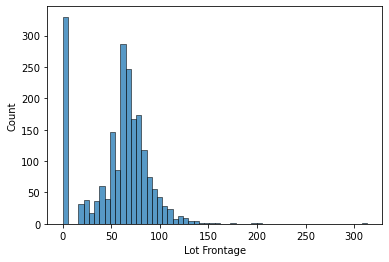

In [61]:
sns.histplot(df['Lot Frontage'])

### We save the eda file in the output folder to call it on the second notebook


In [62]:
#we are good to export this file and start the modelling phase
import os

In [63]:
if not os.path.exists('output'):
    os.makedirs('output')
df.to_csv('output/df_eda_complete.csv')